In [1]:
from text_classifier import TextClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
tc = TextClassifier(['texto dice algo', 'texto dice otra cosa'], ['id1', 'id2'])

In [3]:
tc.store_text(['nuevo texto', 'algo dice el nuevo'], ['id3','id4'], replace_texts=True)

In [4]:
tc.make_classifier("test",['id1','id2','id3','id4'],['a', 'a', 'b','b'])

In [5]:
indices = np.in1d(tc.ids, ['id1','id2','id4'])
indices
tc.tfidf_mat[indices,:]

<3x5 sparse matrix of type '<type 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [8]:
tc.classify("test", examples=["id1", "id2", "id3", 'id4'])

(array(['a', 'b'], 
       dtype='|S1'),
 array([ 5.87072026, -4.9247235 ,  4.99976881,  3.8789758 ]))

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
textvec_palabras = CountVectorizer(input='content', ngram_range=(1,1),  min_df=1)

tfidf_mat = textvec_palabras.fit_transform(['texto dice algo', 'texto dice otra cosa'])

In [26]:
tfidf_mat = TfidfTransformer().fit_transform(tfidf_mat)

In [4]:
np.argsort()

<4x5 sparse matrix of type '<type 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [15]:
textvec_palabras.fit(["mi perro es bueno"])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [18]:
textvec_palabras.vocabulary = ['perro', 'algo']

In [21]:
textvec_palabras.transform(['texto dice algo', 'texto dice otra cosa'])

<2x2 sparse matrix of type '<type 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [20]:
textvec_palabras.fit(['texto dice algo', 'texto dice otra cosa'])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=['perro', 'algo'])

In [9]:
textvec_palabras.inverse_transform(tfidf_mat)

[array([u'texto', u'dice', u'algo'], 
       dtype='<U5'), array([u'texto', u'dice', u'otra', u'cosa'], 
       dtype='<U5')]

# Pruebas de rendimiento.

In [2]:
# Importo datos de prueba
import codecs
import time
testDir = '/home/mec/testData/textos/20_newsgroups/'
cats = os.listdir(testDir)
cats_totales = []
contenidos = []
for cat in cats:
    temp_list = os.listdir(os.path.join(testDir, cat))
    cats_totales = cats_totales + [cat]*len(temp_list)
    temp_list = map(lambda x: os.path.join(testDir,cat,x), temp_list)
    for filename in temp_list:
        with codecs.open(filename, encoding='latin1', mode='r') as content_file:
            lines = content_file.readlines()
            content = ''.join(lines[11:])
        contenidos.append(content)
contenidos = filter(lambda x: len(x)>100, contenidos) # sacar los textos muy cortos

In [4]:
# Tiempo de creacion del objeto
divs = 10
durations = []
n_elements = []
for i in range(1, divs):
    start_time = time.time()
    tc = TextClassifier(contenidos[:len(contenidos)/divs*i], [str(j) for j in range(len(contenidos))])
    duration = time.time() - start_time
    nel = len(contenidos)/divs*i
    print("Tardo {:1.2f} en cargar con {:d} registros".format(duration, nel))
    durations.append(duration)
    n_elements.append(len(contenidos)/divs*i)

Tardo 0.54 en cargar con 1962 registros
Tardo 0.86 en cargar con 3924 registros
Tardo 1.21 en cargar con 5886 registros
Tardo 1.67 en cargar con 7848 registros
Tardo 2.07 en cargar con 9810 registros
Tardo 2.53 en cargar con 11772 registros
Tardo 3.04 en cargar con 13734 registros
Tardo 3.37 en cargar con 15696 registros
Tardo 4.05 en cargar con 17658 registros


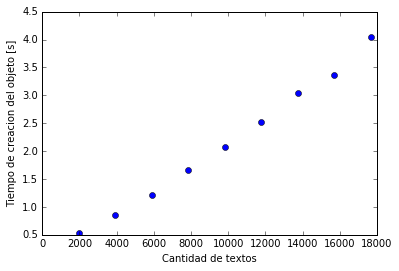

In [7]:
# Grafico de lo anterior

plt.plot(n_elements,durations,'o')
plt.xlabel("Cantidad de textos")
plt.ylabel("Tiempo de creacion del objeto [s]")


In [3]:
# Memoria de creacion del objeto
import cPickle
divs = 10
memory = []
n_elements = []
for i in range(1, divs):
    tc = TextClassifier(contenidos[:len(contenidos)/divs*i], [str(j) for j in range(len(contenidos))])
    L = len(cPickle.dumps(tc))
    memory.append(L)
    nel = len(contenidos)/divs*i
    print("Ocupo {:1.2f} en cargar con {:d} registros".format(float(L)/1024/1024, nel))
    n_elements.append(len(contenidos)/divs*i)

Ocupo 19.56 en cargar con 1962 registros
Ocupo 42.84 en cargar con 3924 registros
Ocupo 59.73 en cargar con 5886 registros
Ocupo 86.39 en cargar con 7848 registros
Ocupo 104.68 en cargar con 9810 registros
Ocupo 130.41 en cargar con 11772 registros
Ocupo 149.58 en cargar con 13734 registros
Ocupo 176.97 en cargar con 15696 registros
Ocupo 207.53 en cargar con 17658 registros


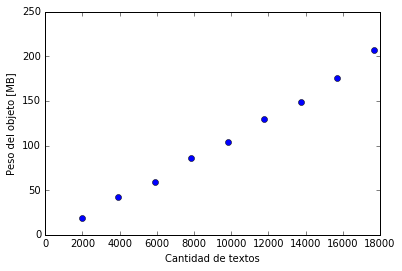

In [4]:
# Grafico de lo anterior

plt.plot(n_elements, np.array(memory)/1024/1024,'o')
plt.xlabel("Cantidad de textos")
plt.ylabel("Peso del objeto [MB]")


In [22]:
%%bash
free

              total        used        free      shared  buff/cache   available
Mem:        3959496     2515836      250568      797244     1193092      371632
Swap:       4106236     1522036     2584200


In [24]:
%%bash
free

              total        used        free      shared  buff/cache   available
Mem:        3959496     2418684      331356      812832     1209456      453152
Swap:       4106236     1521992     2584244


# Pruebas con datos de JGM

In [17]:
import pandas as pd
archivos_excel =[unicode(archivo, 'utf') for archivo in os.listdir('./borrador/') if 'xlsx' in archivo]
all_dataframes = []
for archivo in archivos_excel:
    all_dataframes.append(pd.read_excel(os.path.join('.','borrador',archivo), sheetname='Respuestas de formulario 1'))
all_questions = pd.concat([x.Pregunta for x in all_dataframes], keys=['94', '94FT','95', '93']).to_frame()
preg_cat = pd.read_excel('./borrador/Informe 93 - HCDN (Respuestas) (1) (1).xlsx',sheetname='Respuestas de formulario 1')
preg_cat = preg_cat.sortlevel(0)
all_questions = all_questions.sortlevel(0)
all_questions.loc['93','tema'] = preg_cat.Tema.values
all_questions.dropna(subset=['Pregunta'], inplace=True)
ES_stopwords = pd.read_csv('ES_stopwords.txt',header=None, encoding='utf-8')
ES_stopwords = list(np.squeeze(ES_stopwords.values))
all_questions.dropna(subset=['Pregunta'], inplace=True) # Sacar preguntas vacias
longitud = all_questions.Pregunta.str.len()
all_questions = all_questions.loc[longitud.sort_values().index[50:]] # Sacar preguntas demasiado cortas

In [18]:
preguntas = all_questions.Pregunta
temas = all_questions.tema
ids = [str(i) for i in range(len(preguntas))]
tc = TextClassifier(preguntas, ids)

In [24]:
tc.get_similar("1111", max_similars=10)

(['1276',
  '490',
  '1730',
  '1663',
  '1591',
  '1547',
  '670',
  '1774',
  '1054',
  '1269'],
 [1.2288798094209452,
  1.2430788384158264,
  1.2544258965119799,
  1.2562441261041586,
  1.2881940498652613,
  1.2919609024770631,
  1.3023754002500396,
  1.3061540754333394,
  1.3076465960654795,
  1.3091542255528033],
 [[u'convenio', u'adoptadas', u'ministerio', u'planificacion', u'federal'],
  [u'2015', u'11', u'fecha', u'informe'],
  [u'convenio', u'gasoducto', u'planificacion', u'federal'],
  [u'costa', u'2015', u'gasoducto', u'ampliacion', u'nacion'],
  [u'convenio', u'fecha', u'suscripto', u'nacion'],
  [u'convenio', u'medidas', u'region', u'nacion'],
  [u'ministerio', u'planificacion', u'nacion'],
  [u'septiembre', u'ministerio', u'2015', u'fecha', u'informe', u'nacion'],
  [u'convenio', u'suscripto', u'informe'],
  [u'ministerio', u'planificacion', u'federal']])

# Otras pruebas


In [2]:
import codecs
import copy

TEST_DIR = "/home/mec/testData/textos/20_newsgroups/"
cats = os.listdir(TEST_DIR)
cats_totales = []
contenidos = []
for cat in cats:
    temp_list = os.listdir(os.path.join(TEST_DIR, cat))
    cats_totales = cats_totales + [cat for i in range(len(temp_list))]
    temp_list = map(lambda x: os.path.join(TEST_DIR, cat, x),
                    temp_list)
    for filename in temp_list:
        with codecs.open(
                filename, encoding='latin1', mode='r') as content_file:
            lines = content_file.readlines()
            filtered_lines = [line for line in lines[11:] if line[0] not in ['$', '>']]
            content = ''.join(filtered_lines)
        contenidos.append(content)
# sacar los textos muy cortos
largo = map(len, contenidos)
contenidos = [c for c, l in zip(contenidos, largo) if l > 100]
labels = cats_totales
labels = [lab for lab, l in zip(cats_totales, largo) if l > 100]
ids = [str(i) for i in range(len(contenidos))]
sorted_labels = [x for (y,x) in sorted(zip(ids,cats_totales))]
texts = copy.deepcopy(contenidos)
tc = TextClassifier(texts, ids)

In [102]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            ids, labels, test_size=0.5, random_state=42)

In [103]:
tc.make_classifier("prueba", X_train, y_train)
indices = np.searchsorted(tc.ids, X_test)
my_score = tc.prueba.score(tc.tfidf_mat[indices,:], y_test)
my_score

0.80846051418621323

# DEBUGGING! 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
tv = TfidfVectorizer(input='content', encoding='latin1', decode_error='strict', strip_accents='ascii', 
                     lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, 
                     ngram_range=(1, 1), max_df=1.0, min_df=3, max_features=None, 
                     vocabulary=None, binary=False, norm='l2', use_idf=True, 
                     smooth_idf=True, sublinear_tf=False)
ct = CountVectorizer(input='content', encoding='latin1', decode_error='strict', strip_accents='ascii', 
                     lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, 
                     ngram_range=(1, 1), max_df=1.0, min_df=3, max_features=None, 
                     vocabulary=None, binary=False)
tfidf_mat = tv.fit_transform(contenidos)
count_mat = ct.fit_transform(contenidos)

In [120]:
from sklearn.svm import LinearSVC
#tfidf_mat = tc.tfidf_mat
X_train, X_test, y_train, y_test = train_test_split(
                tfidf_mat, labels, test_size=0.5, random_state=0)
svm = LinearSVC()


svm.fit(X_train, y_train)
print "Score correctas: {:f}".format(svm.score(X_test,y_test))

Score correctas: 0.806105


# Pruebas de terminos similares

In [13]:
from sklearn.metrics.pairwise import pairwise_distances

In [5]:
ejemplo = 100

vector_ejemplo = tfidf_mat[ejemplo,:]
distancias = pairwise_distances(tfidf_mat, vector_ejemplo)
distancias[ejemplo]=np.inf
I = np.argsort(np.squeeze(distancias))
top5 = I[:5]

In [6]:
print(contenidos[ejemplo])
I = np.argsort(np.squeeze(vector_ejemplo.toarray()))
print([k for k,v in tv.vocabulary_.iteritems() if v in I[-10:]])
print("."*100)
print("."*100)
    
for t in top5:
    vector_prueba = tfidf_mat[t,:]
    diferencias = (vector_ejemplo - vector_prueba)/vector_ejemplo.power(2) + vector_prueba.power(2)
    diferencias = np.squeeze(np.array(diferencias))
    I = np.argsort(np.squeeze(vector_prueba.toarray()))
    #I = np.argsort(diferencias)
    print(contenidos[t])
    print([k for k,v in tv.vocabulary_.iteritems() if v in I[-10:]])
    print("."*100)
   


In article <1993May17.061914.22239@cs.sfu.ca> chapman@cs.sfu.ca (John Chapman) writes:
PaintShop Pro for Windows is a fantastic product.  It can handle TIFF, GIF,
BMP, PCX, and many other formats, displaying them and converting between
them.  There is a shareware version of the program; I assume it's available
in the Windows areas of the standard anonymous FTP locations (I'd try
ftp.cica.indiana.edu).  Log in as ftp, use your username as a password,
and look for a program called PSP101.exe or something like that.  I have
the registered version, and the only major difference I can detect is that
the unregistered version pops up a message when you start the program
asking you to please register it.

Once again, FANTASTIC software.  Up to 24 bits, huge images, everything.

-Brian


-- 
Brian Kasper, AKA Prisoner 655321   | "My hovercraft is full of eels."
The Aerospace Corporation           |
Internet: kasper@aerospace.aero.org | 

[u'chapman', u'brian', u'kasper', u'program', u'aerospac

In [91]:
np.squeeze(I)[-10:]

array([29114, 29257, 27714, 11249, 28555, 40677, 21242, 46204,  7797, 37277])

In [89]:
for k,v in tv.vocabulary_.iteritems():
    if v in I[-10:]:
        print k

nunnery
woods
mdbs
woody
spidery
sprague
5980
rscharfy
bringing
receiving
wooden
wednesday
rauno
circuitry
amplifications
thrace
gaskets
270
271
272
273
274
275
276
277
278
279
targa
mdata
dialogs
defenses
usenet
outfielders
replaced
odinsup
tekprstbl
devellano
mailings
27k
affiliates
kids
101356
controversy
tredysvr
_would_
topography
dnd
dna
dnc
dnm
dnv
violently
benedikt
populations
pirenne
hyatt
titanium
beyer
constantinopolitan
r3000
sgi502
assimilated
dinosaurs
wrong
sentencing
snugly
welcomed
airbags
wherein
activating
fir
fiv
fit
discourse
folate
fif
fig
fij
fih
fin
fil
fim
foolin
vouchers
barton
rasterizer
xuserfilesearchpath
6ql
husbands
purpose
curiouser
implimentation
megabytes
olds
needed
acsnet
master
c5s5n0
genesis
blackfriars
positively
ahmed
ahmet
cyen
whitcomb
consenting
pb2esac
mweintr
kremlin
shipments
45th
toil
reverence
garrotte
tech
hiatt
dickey
tempted
hounded
nordique
lube
100010
photoelectric
patch
irq
irs
iri
irl
srinivas
conductive
ira
irb
irc
ire
discipline

## Con los datos de JGM

In [8]:
import pandas as pd
archivos_excel =[unicode(archivo, 'utf') for archivo in os.listdir('./borrador/') if 'xlsx' in archivo]
all_dataframes = []
for archivo in archivos_excel:
    all_dataframes.append(pd.read_excel(os.path.join('.','borrador',archivo), sheetname='Respuestas de formulario 1'))
all_questions = pd.concat([x.Pregunta for x in all_dataframes], keys=['94', '94FT','95', '93']).to_frame()
preg_cat = pd.read_excel('./borrador/Informe 93 - HCDN (Respuestas) (1) (1).xlsx',sheetname='Respuestas de formulario 1')
preg_cat = preg_cat.sortlevel(0)
all_questions = all_questions.sortlevel(0)
all_questions.loc['93','tema'] = preg_cat.Tema.values
all_questions.dropna(subset=['Pregunta'], inplace=True)
ES_stopwords = pd.read_csv('ES_stopwords.txt',header=None, encoding='utf-8')
ES_stopwords = list(np.squeeze(ES_stopwords.values))
all_questions.dropna(subset=['Pregunta'], inplace=True) # Sacar preguntas vacias
longitud = all_questions.Pregunta.str.len()
all_questions = all_questions.loc[longitud.sort_values().index[50:]] # Sacar preguntas demasiado cortas

In [11]:
preguntas = all_questions.Pregunta
temas = all_questions.tema
tv = TfidfVectorizer(input='content', encoding='latin1', decode_error='strict', strip_accents='ascii', 
                     lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=ES_stopwords, 
                     ngram_range=(1, 1), max_df=1.0, min_df=3, max_features=None, 
                     vocabulary=None, binary=False, norm='l2', use_idf=True, 
                     smooth_idf=True, sublinear_tf=False)

tfidf_mat = tv.fit_transform(preguntas)

In [14]:
ejemplo = 773

vector_ejemplo = tfidf_mat[ejemplo,:].toarray()
distancias = pairwise_distances(tfidf_mat, vector_ejemplo)
distancias[ejemplo]=np.inf
I = np.argsort(np.squeeze(distancias))
top5 = I[:5]

Detalle las estimaciones de agua necesarias para cada perforación que se realizará en el yacimiento Vaca Muerta, precisando las fuentes de abastecimiento del recurso hídrico. -
[u'hidrico', u'muerta', u'recurso', u'abastecimiento', u'yacimiento']
....................................................................................................
....................................................................................................
YPF-Chevron
Se solicita al Sr. Jefe de Gabinete de Ministros brindar información acerca del convenio firmado con la petrolera Chevrón en el marco del Decreto 929/2013 Régimen de promoción de inversión para la explotación de hidrocarburos a fin de explotar hidrocarburos en el Yacimiento de Vaca Muerta.
Informe en tal sentido, cual es la jurisdicción que dirimirá posibles conflictos en la ejecución del contrato.
Remita el contrato suscripto entre YPF y Repsol para la exploración del yacimiento de Vaca Muerta.
[u'muerta', u'vaca', u'yacimiento']
..

/home/mec/anaconda2/lib/python2.7/site-packages/pandas/indexes/multi.py:610: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


-¿Cuáles han sido las razones para que el Gobierno Nacional, desconociendo la sentencia de la Corte Suprema de Justicia de la Nación, haya ordenado a YPF no dar a conocer el contrato celebrado con Chevron respecto a los yacimientos existentes en Vaca Muerta?
[u'muerta', u'vaca']
....................................................................................................
Informe cuáles han sido las razones para que el gobierno nacional, desconociendo la sentencia de la Corte Suprema de Justicia de la Nación, haya ordenado a Yacimientos Petrolíferos Fiscales no dar a conocer el contrato celebrado con Chevron respecto a los yacimientos existentes en el lugar denominado Vaca Muerta. 
[u'muerta', u'vaca']
....................................................................................................
El gobierno anterior anunció la construcción de una usina en el Yacimiento Carbonífero de Río Turbio con el objeto de que funcione a carbón, la usina no se terminó y no hay carbón p

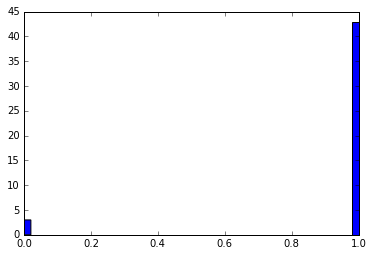

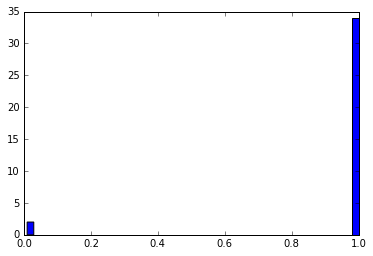

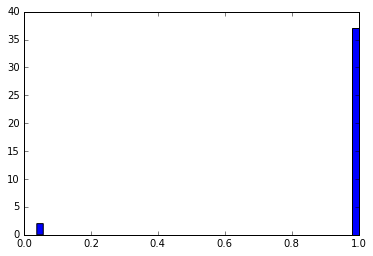

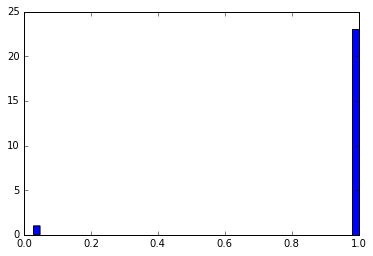

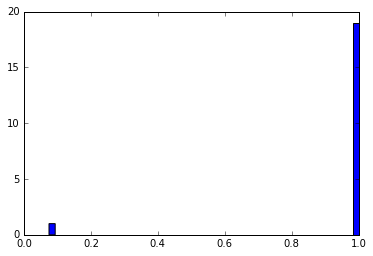

In [15]:
print(preguntas[ejemplo])
I = np.argsort(np.squeeze(vector_ejemplo))
print([k for k,v in tv.vocabulary_.iteritems() if v in I[-5:]])
print("."*100)
print("."*100)
    
for t in top5:
    vector_prueba = tfidf_mat[t,:].toarray()
    diferencias = np.abs(vector_ejemplo - vector_prueba)**2/(vector_ejemplo**2 + vector_prueba**2)
    diferencias = np.squeeze(np.array(diferencias))
    plt.figure()
    plt.hist(diferencias[~np.isnan(diferencias)],50)
    I = np.argsort(diferencias)
    corte = np.flatnonzero((diferencias[I] > 0.6) | (np.isnan(diferencias[I])))[0]
    print(preguntas[t])
    print([k for k,v in tv.vocabulary_.iteritems() if v in I[:corte]])
    print("."*100)

In [237]:
 np.flatnonzero(diferencias[I] > 2)

array([], dtype=int64)

In [197]:
np.nansum(~np.isnan(diferencias[I]))

0

In [223]:
diferencias[I]

array([  0.,   0.,   0., ...,  nan,  nan,  nan])